In [ ]:
! pip install pandas
! pip install sklearn
! pip install jupyter
! pip install joblib
! pip install matplotlib 
! pip install pymongo
! pip install flask
! pip install flask_cors

zsh:1: /Users/nateedge/Documents/repos/job-raptor/venv/bin/pip: bad interpreter: /Users/nateedge/Documents/repos/netWork-job-posting-platform/venv/bin/python3.12: no such file or directory
zsh:1: /Users/nateedge/Documents/repos/job-raptor/venv/bin/pip: bad interpreter: /Users/nateedge/Documents/repos/netWork-job-posting-platform/venv/bin/python3.12: no such file or directory
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt

# RUBRIC ITEM: Collected Dataset
# Load the dataset
data = pd.read_csv("../data/fake_job_postings.csv")

# RUBRIC ITEM: Descriptive Method (Inspecting columns and structures for analysis)
# Inspect column names and structure
print(data.columns)
print(data.head())

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the wor

In [ ]:
# RUBRIC ITEM: Support for feauturizing, parsing, cleaning, and wrangling dataset (Clean data)
# Preprocess dataset: drop rows with missing 'title', 'function' or 'description' values
data = data.dropna(subset=['title', 'description'])

# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Preprocess data)
# Features and target variable
X = data[['title', 'description']]
y = data['fraudulent']

# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Select training sets)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Preprocess data)
# Define preprocessing for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('title', TfidfVectorizer(), 'title'),
        ('description', TfidfVectorizer(), 'description')  
    ])

# RUBRIC ITEM: Predictive Method (Decision Tree)
# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Algorithm)
# Create pipeline that transforms data and fits DecisionTreeClassifier with class weight
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))  
])

# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Train the Algorithm)
# Train the model
pipeline.fit(X_train, y_train)

# RUBRIC ITEM: Functionalities to evaluate the accuracy of data
# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# RUBRIC ITEM: Methods and algorithms supporting data exploration and preparation (Save Algorithm)
# Save trained model to file
joblib.dump(pipeline, '../model/decision_tree_model_pipeline.pkl')


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3394
           1       0.57      0.63      0.60       182

    accuracy                           0.96      3576
   macro avg       0.77      0.80      0.79      3576
weighted avg       0.96      0.96      0.96      3576



['../model/decision_tree_model_pipeline.pkl']

In [ ]:
# Load the trained model pipeline
model = joblib.load('../model/decision_tree_model_pipeline.pkl')

# Example prediction
example = pd.DataFrame([{'title': 'Administrative Assistant', 'description': 'This is a fake job posting example'}])

# RUBRIC ITEM: Decision Support Functionality (Determine if job post is real or fake)
# Predict using the loaded model
prediction = model.predict(example)
print("Prediction (fake job):", "Fake" if prediction[0] == 1 else "Real")

Prediction (fake job): Fake


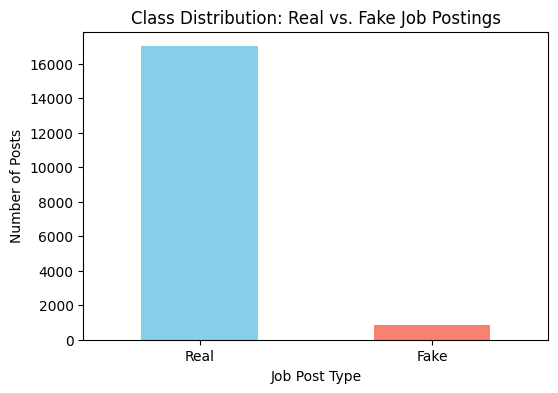

In [ ]:
# RUBRIC ITEM: Data Visualization (Bar Graph - Real vs. Fake Job Postings)

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Real vs. Fake Job Postings')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'], rotation=0)
plt.ylabel('Number of Posts')
plt.xlabel('Job Post Type')
plt.show()

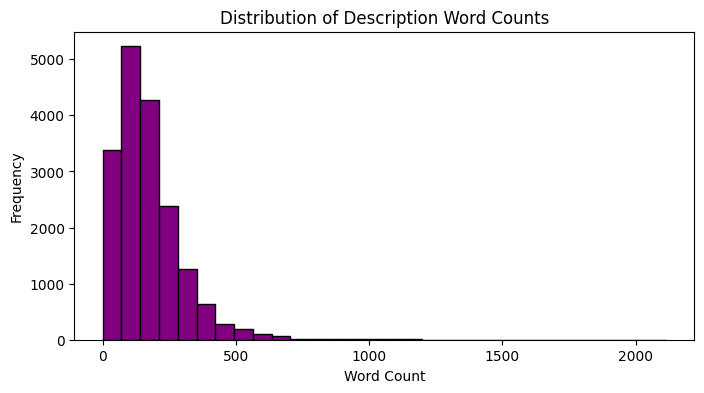

In [ ]:
# RUBRIC ITEM: Data Visualization (Histogram - Distribution of Description Word Count)
# Add a new column for description word count
data['description_word_count'] = data['description'].apply(lambda x: len(x.split()))

# Plot histogram
plt.figure(figsize=(8, 4))
data['description_word_count'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Description Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

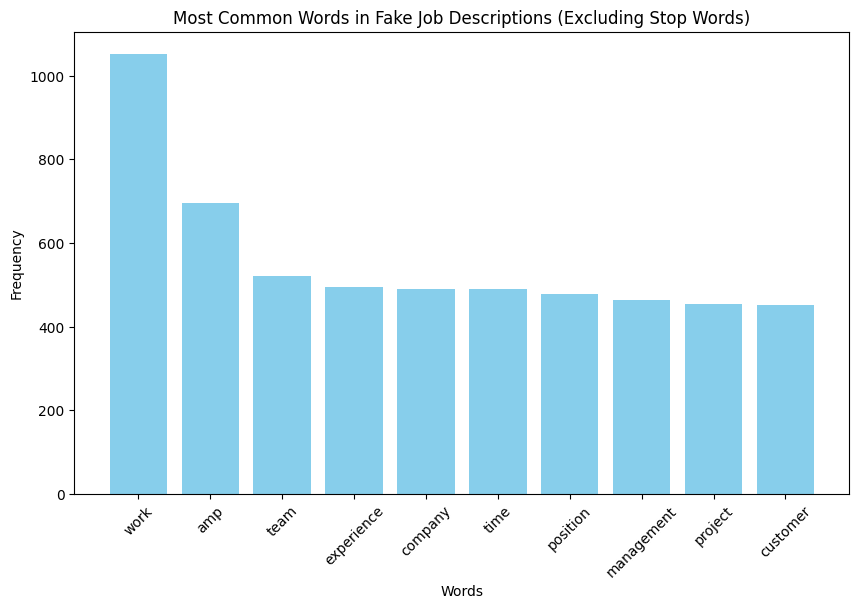

In [ ]:
# RUBRIC ITEM: Data Visualization (Graph - Most Common Words in fake job posting)

from collections import Counter
import re

# Define a list of common stop words
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",
    "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
    "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
    "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven",
    "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Filter fake job descriptions
fake_jobs = data[data['fraudulent'] == 1]

# Preprocess the descriptions: remove non-alphabetic characters and split into words
text = ' '.join(fake_jobs['description'])
words = re.findall(r'\b\w+\b', text.lower())  # Extract words and convert to lowercase

# Remove stop words from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies using Counter
word_counts = Counter(filtered_words)

# Get the 10 most common words
common_words = word_counts.most_common(10)

# Separate the words and their frequencies for plotting
words, counts = zip(*common_words)

# Plot the most common words using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Most Common Words in Fake Job Descriptions (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()